# Naive Bayes Classifier on Abalone Dataset

## input: Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight

In [2]:
#importing the necessary libraries
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report , confusion_matrix 

In [3]:
#importing the data set
df = pd.read_csv(r'C:\Users\nitis\python_project\ML\week9 KNN NB DT\NB\abalone_csv.csv')
df.head()

Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  Viscera_weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell_weight  Class_number_of_rings  
0         0.150                     15  
1         0.070                      7  
2         0.210                      9  
3         0.155                     10  
4         0.055                      7

In [4]:
#displaying info of data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Sex                    4177 non-null   object 
 1   Length                 4177 non-null   float64
 2   Diameter               4177 non-null   float64
 3   Height                 4177 non-null   float64
 4   Whole_weight           4177 non-null   float64
 5   Shucked_weight         4177 non-null   float64
 6   Viscera_weight         4177 non-null   float64
 7   Shell_weight           4177 non-null   float64
 8   Class_number_of_rings  4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [5]:
#checking for null values
df.isnull().sum()

Sex                      0
Length                   0
Diameter                 0
Height                   0
Whole_weight             0
Shucked_weight           0
Viscera_weight           0
Shell_weight             0
Class_number_of_rings    0
dtype: int64

In [6]:
#dropping the coloumn play in order to predict
X = df.drop('Class_number_of_rings', axis = 1)
X.head()

Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  Viscera_weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell_weight  
0         0.150  
1         0.070  
2         0.210  
3         0.155  
4         0.055

In [13]:
df['Sex'].unique()

array(['M', 'F', 'I'], dtype=object)

In [12]:
#since every coloumn in categorical value converting them
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['Sex'] = le.fit_transform(X['Sex'])
X.head()

Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  \
0    2   0.455     0.365   0.095        0.5140          0.2245   
1    2   0.350     0.265   0.090        0.2255          0.0995   
2    0   0.530     0.420   0.135        0.6770          0.2565   
3    2   0.440     0.365   0.125        0.5160          0.2155   
4    1   0.330     0.255   0.080        0.2050          0.0895   

   Viscera_weight  Shell_weight  
0          0.1010         0.150  
1          0.0485         0.070  
2          0.1415         0.210  
3          0.1140         0.155  
4          0.0395         0.055

In [7]:
#creating y data
y = df[['Class_number_of_rings']]
y.head()

Class_number_of_rings
0                     15
1                      7
2                      9
3                     10
4                      7

In [8]:
splits =  [2,3,4,5,6,7,8,9] 
random_states = [0, 42]

In [14]:
result = []
for split_size in splits:
    split_size = split_size / 10
    for random_state in random_states:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_size, random_state=random_state , shuffle=True)
        model = GaussianNB()
        nbtrain = model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        result.append(["DT","play_tennis", split_size, random_state, accuracy])

result = pd.DataFrame(result, columns=["Model","Data_SET","train-test-split","Random_State","accuracy_score"])

C:\Users\nitis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\nitis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\nitis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the sha

In [15]:
result

Model     Data_SET  train-test-split  Random_State  accuracy_score
0     DT  play_tennis               0.2             0        0.241627
1     DT  play_tennis               0.2            42        0.236842
2     DT  play_tennis               0.3             0        0.245614
3     DT  play_tennis               0.3            42        0.243222
4     DT  play_tennis               0.4             0        0.242370
5     DT  play_tennis               0.4            42        0.257331
6     DT  play_tennis               0.5             0        0.238392
7     DT  play_tennis               0.5            42        0.253231
8     DT  play_tennis               0.6             0        0.169126
9     DT  play_tennis               0.6            42        0.237734
10    DT  play_tennis               0.7             0        0.175787
11    DT  play_tennis               0.7            42        0.243502
12    DT  play_tennis               0.8             0        0.178935
13    DT  play_tennis               0.8            42        0.245661
14    DT  play_tennis               0.9             0        0.155053
15    DT  play_tennis               0.9            42        0.226330

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y_e, test_size=0.2, random_state=42 , shuffle=True)
model = GaussianNB()
nbtrain = model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [35]:
#creating confusin matrix
from sklearn.metrics import confusion_matrix
con_mat = confusion_matrix(y_test , y_predict)
con_mat

array([[1, 0],
       [1, 1]], dtype=int64)

<Axes: >

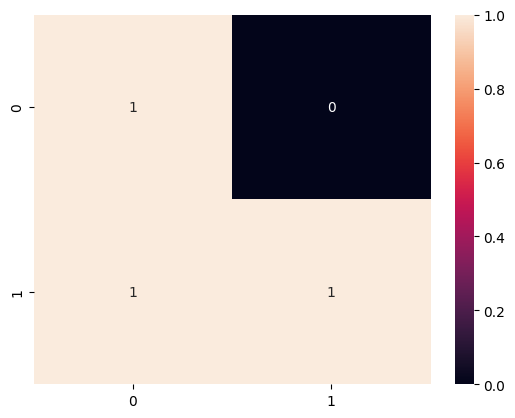

In [36]:
#creating heat map
import seaborn as sns
sns.heatmap(con_mat , annot = True)